# 1

In [1]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload a file from your computer


Saving AAPL, 1D 01012007-12072023.csv to AAPL, 1D 01012007-12072023.csv


In [8]:
import pandas as pd

# Load the uploaded dataset
file_path = '/content/AAPL_1D01012007_12072023.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset for an overview
df.head()


,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


# 2

In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('/content/AAPL_1D01012007_12072023.csv')

# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'], unit='s')

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Display the first few rows of the dataset for an overview
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   volume        4159 non-null   float64       
 1   vwap          4159 non-null   float64       
 2   open          4159 non-null   float64       
 3   close         4159 non-null   float64       
 4   high          4159 non-null   float64       
 5   low           4159 non-null   float64       
 6   time          4159 non-null   datetime64[ns]
 7   transactions  4159 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 260.1 KB
None
             volume         vwap         open        close         high  \
count  4.159000e+03  4159.000000  4159.000000  4159.000000  4159.000000   
mean   3.662925e+08    46.391382    46.362788    46.396058    46.881127   
min    2.422234e+07     2.841000     2.835400     2.792900     2.928600   
25%    1.067497e+0

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,2007-01-03 05:00:00,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,2007-01-04 05:00:00,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,2007-01-05 05:00:00,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,2007-01-08 05:00:00,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,2007-01-09 05:00:00,569578


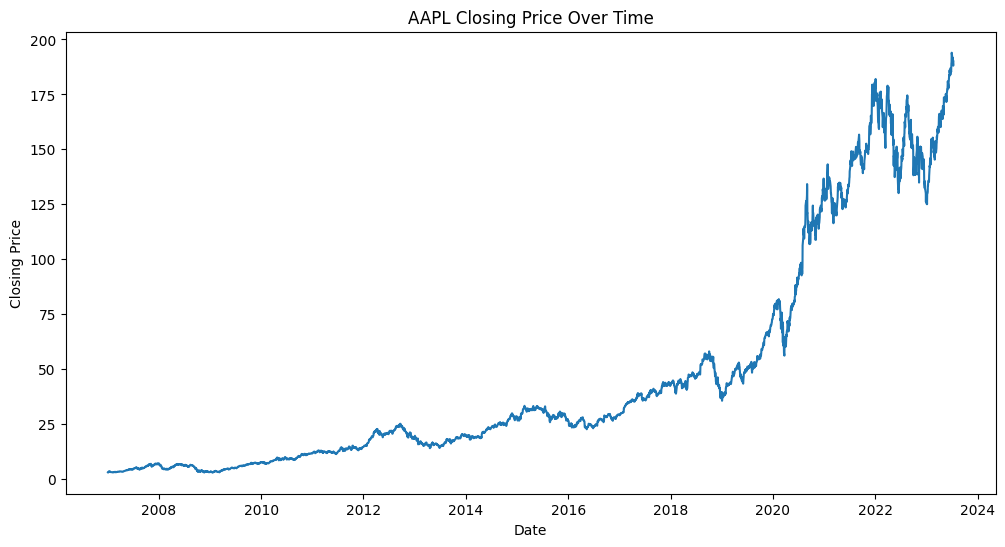

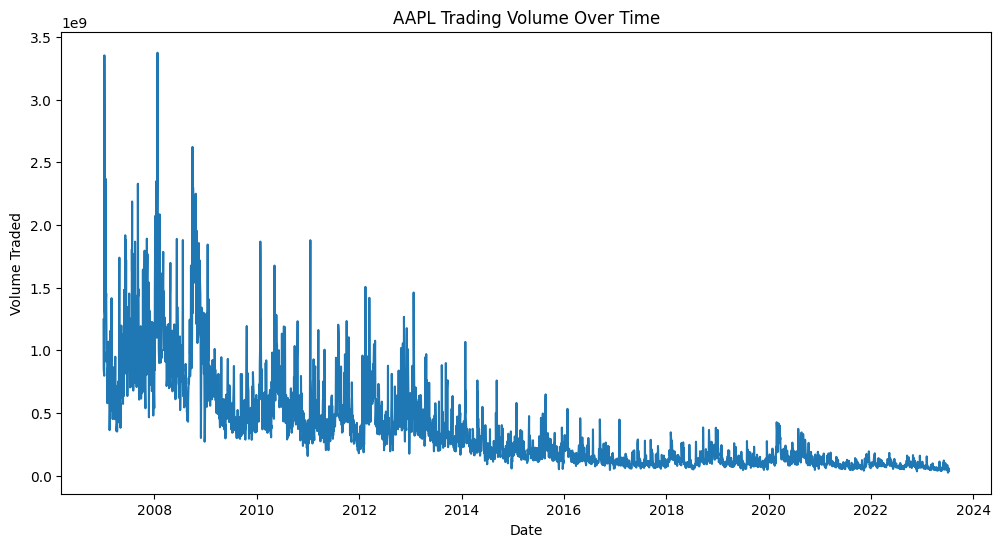

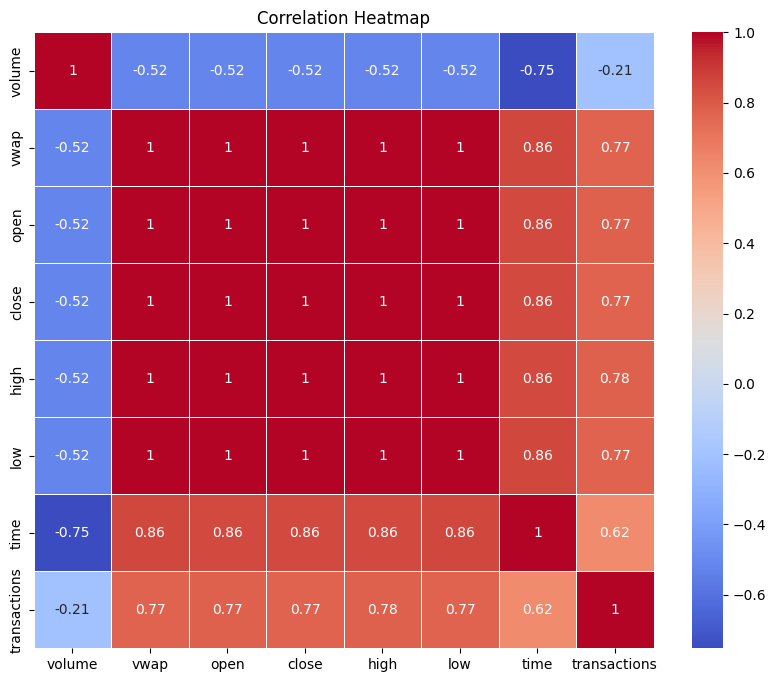

In [11]:
# Plotting the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['close'])
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Visualize volume traded over time
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['volume'])
plt.title('AAPL Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.show()

# Plotting a heatmap of the correlations between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [12]:
# Correlation between closing price and volume
correlation_close_volume = df['close'].corr(df['volume'])
print(f"Correlation between closing price and volume: {correlation_close_volume}")

# Covariance matrix
covariance_matrix = df[['close', 'volume']].cov()
print(covariance_matrix)

# Descriptive statistics for closing prices
df['close'].describe()


Correlation between closing price and volume: -0.5174117560070657
               close        volume
close   2.529434e+03 -9.692819e+09
volume -9.692819e+09  1.387408e+17


,close
count,4159.000000
mean,46.396058
std,50.293482
min,2.792900
25%,11.947150
50%,25.825000
75%,52.231250
max,193.970000


In [13]:
from scipy import stats

# Example Hypothesis Test: Is there a significant difference in average closing prices before and after a specific date?
split_date = '2020-01-01'
before = df[df['time'] < split_date]['close']
after = df[df['time'] >= split_date]['close']

# T-test for independent samples
t_stat, p_value = stats.ttest_ind(before, after, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in closing prices before and after the split date.")
else:
    print("Fail to reject the null hypothesis: No significant difference in closing prices.")


T-statistic: -104.31435117944318, P-value: 0.0
Reject the null hypothesis: There is a significant difference in closing prices before and after the split date.


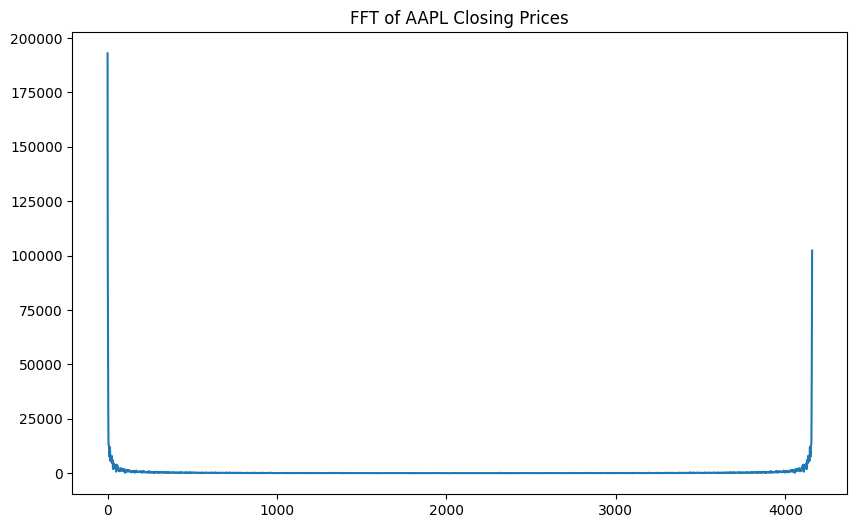

In [14]:
from scipy.fft import fft

# Fourier Transform on closing prices
close_fft = fft(df['close'].values)
plt.figure(figsize=(10, 6))
plt.plot(np.abs(close_fft))
plt.title('FFT of AAPL Closing Prices')
plt.show()


In [15]:
# Basic statistical analysis using NumPy
mean_price = np.mean(df['close'])
median_price = np.median(df['close'])
std_price = np.std(df['close'])

print(f"Mean closing price: {mean_price}")
print(f"Median closing price: {median_price}")
print(f"Standard deviation of closing prices: {std_price}")


Mean closing price: 46.39605770617938
Median closing price: 25.825
Standard deviation of closing prices: 50.28743567818999


In [16]:
correlation_close_volume = df['close'].corr(df['volume'])
print(f"Correlation between closing price and volume: {correlation_close_volume}")


Correlation between closing price and volume: -0.5174117560070657


In [17]:
from scipy import stats
before = df[df['time'] < '2020-01-01']['close']
after = df[df['time'] >= '2020-01-01']['close']
t_stat, p_value = stats.ttest_ind(before, after, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -104.31435117944318, P-value: 0.0


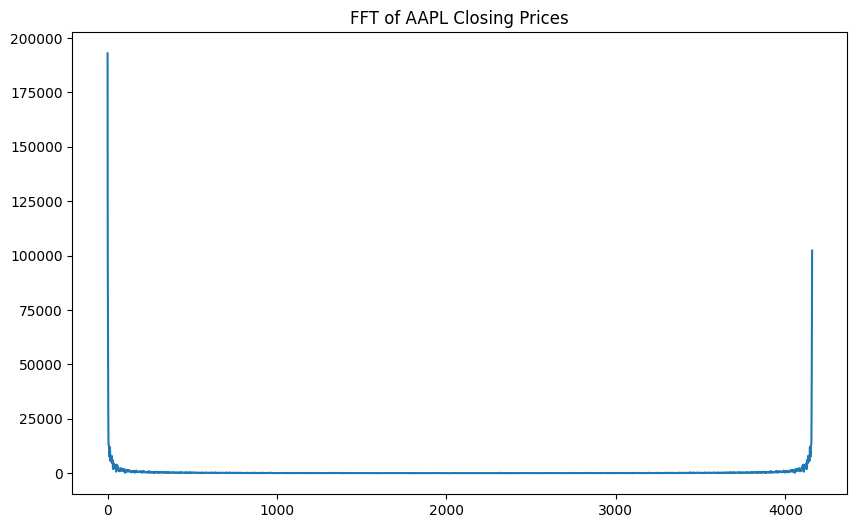

In [18]:
from scipy.fft import fft
close_fft = fft(df['close'].values)

plt.figure(figsize=(10, 6))
plt.plot(np.abs(close_fft))
plt.title('FFT of AAPL Closing Prices')
plt.show()
